In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

print(data.head())


             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature

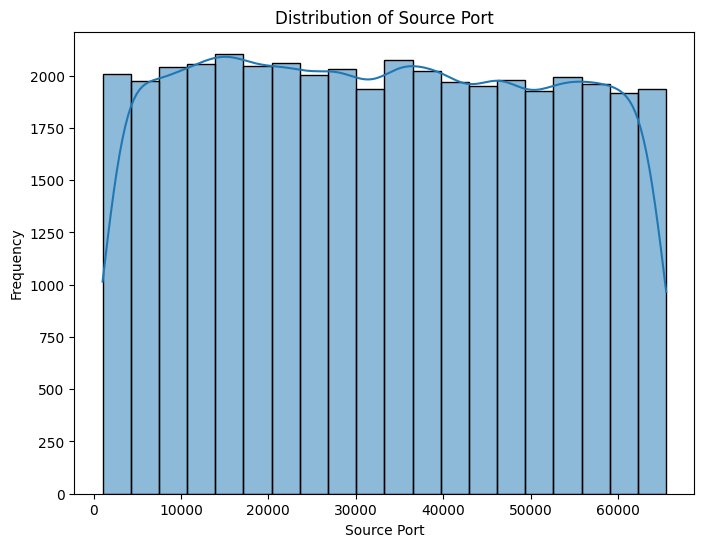

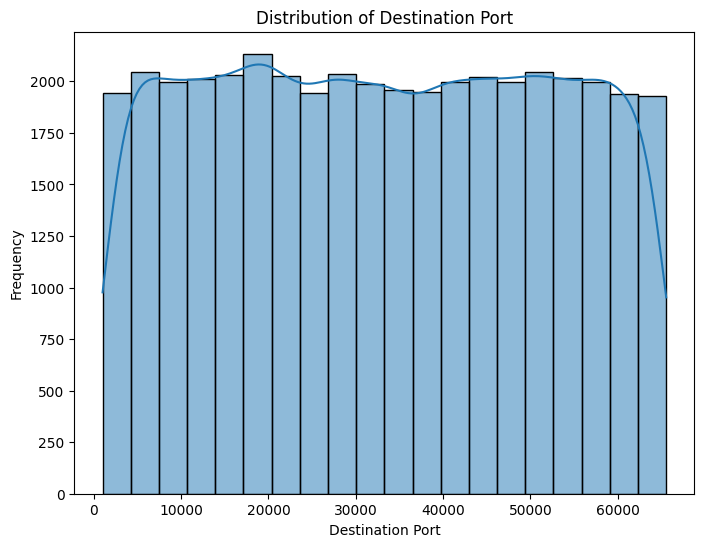

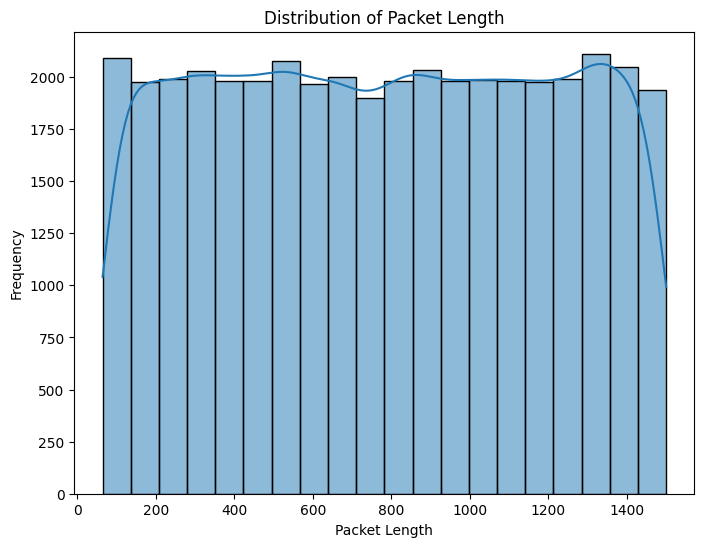

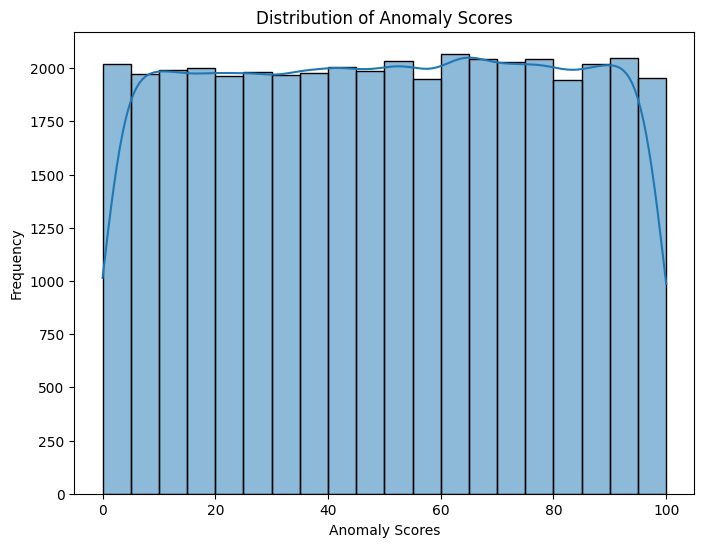


Pairwise Relationships:


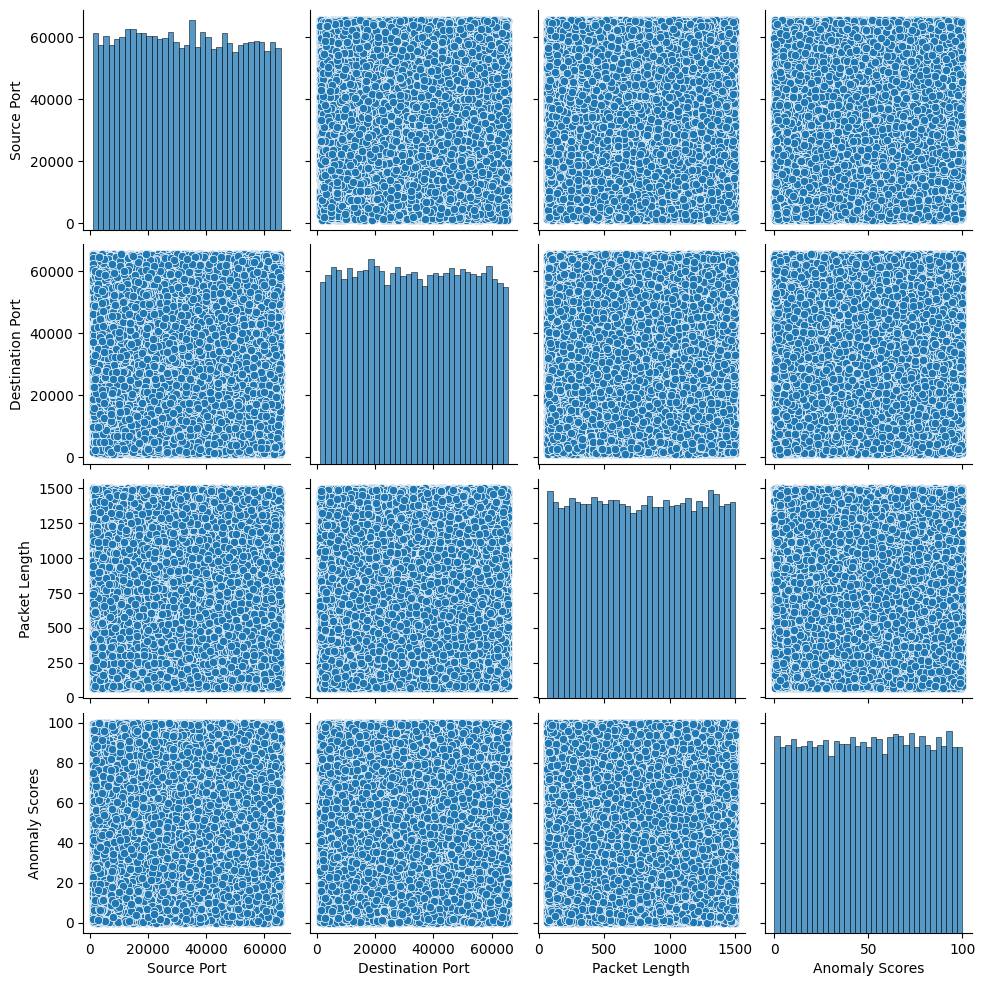


Missing Values:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Outliers:


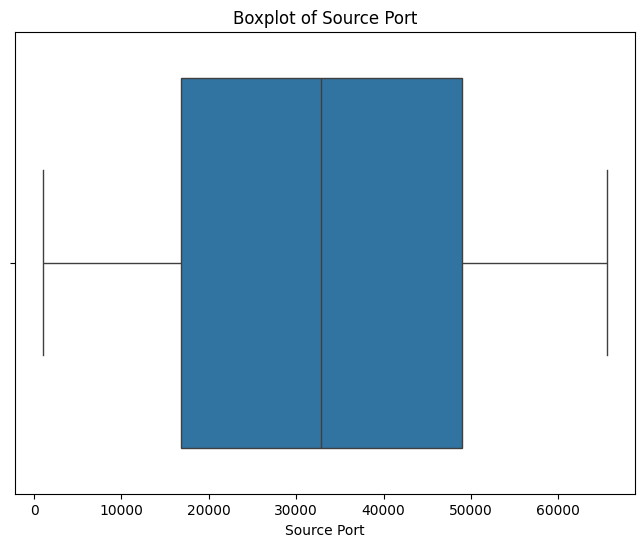

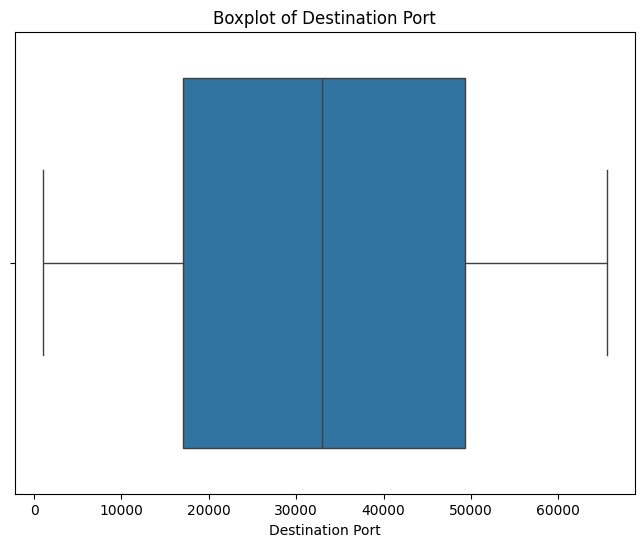

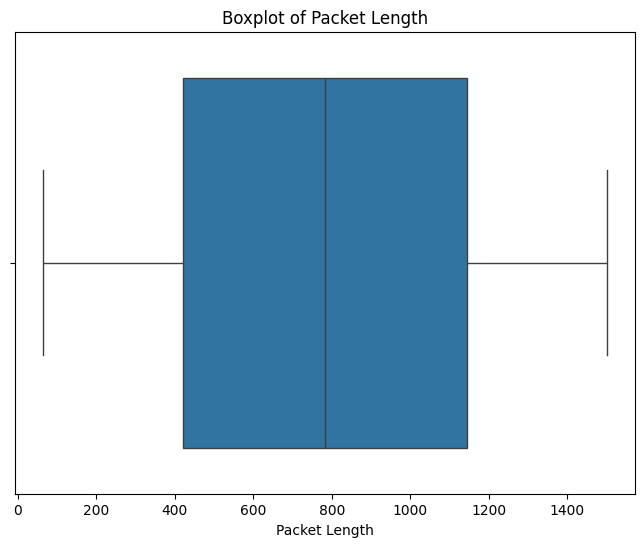

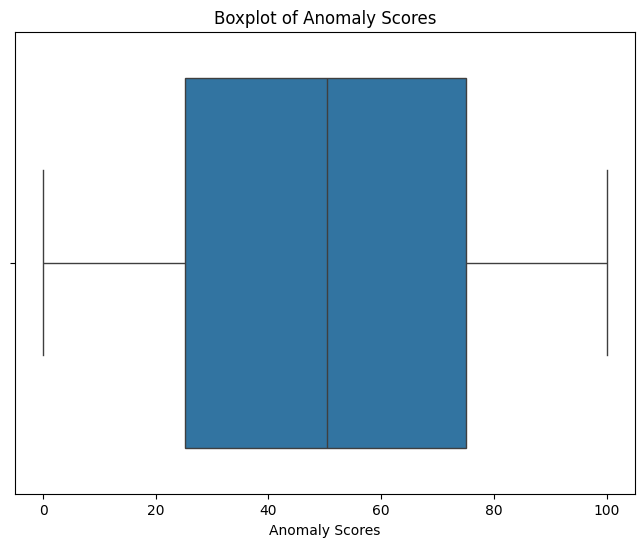


Unique Values in Categorical Columns:
Unique values in Timestamp: ['2023-05-30 06:33:58' '2020-08-26 07:08:30' '2022-11-13 08:23:25' ...
 '2022-03-31 01:45:49' '2023-09-22 18:32:38' '2023-10-10 11:59:52']
Unique values in Source IP Address: ['103.216.15.12' '78.199.217.198' '63.79.210.48' ... '162.35.217.57'
 '208.72.233.205' '14.102.21.108']
Unique values in Destination IP Address: ['84.9.164.252' '66.191.137.154' '198.219.82.17' ... '98.107.0.15'
 '173.79.112.252' '109.198.45.7']
Unique values in Protocol: ['ICMP' 'UDP' 'TCP']
Unique values in Packet Type: ['Data' 'Control']
Unique values in Traffic Type: ['HTTP' 'DNS' 'FTP']
Unique values in Payload Data: ['Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.'
 'Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectet

In [26]:
import seaborn as sns
print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nDistribution of Features:")
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

print("\nPairwise Relationships:")
sns.pairplot(data)
plt.show()

print("\nMissing Values:")
print(data.isnull().sum())

print("\nOutliers:")
numerical_columns = data.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

print("\nUnique Values in Categorical Columns:")
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {data[column].unique()}")

In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


X = data.drop(columns=['Action Taken'], axis=1)  
y = data['Action Taken'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Categorical Columns:
Index(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

X_train shape: (32000, 24)
y_train shape: (32000,)
X_test shape: (8000, 24)
y_test shape: (8000,)


In [28]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


data['HourOfDay'] = data['Timestamp'].dt.hour  
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek  
data['Month'] = data['Timestamp'].dt.month 


print("Updated Dataset with New Features:")
print(data.head())

Updated Dataset with New Features:
                      Timestamp  Source IP Address  Destination IP Address  \
0 1970-01-01 00:00:00.000036141                939                   37091   
1 1970-01-01 00:00:00.000006759              35826                   33418   
2 1970-01-01 00:00:00.000030425              32917                   19496   
3 1970-01-01 00:00:00.000037100              12598                     592   
4 1970-01-01 00:00:00.000037488              34515                   17716   

   Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
0        31225             17616         0            503            1   
1        17245             48166         0           1174            1   
2        16811             53600         2            306            0   
3        20018             32534         2            385            1   
4         6131             26646         1           1462            1   

   Traffic Type  Payload Data  ...  Device Informat

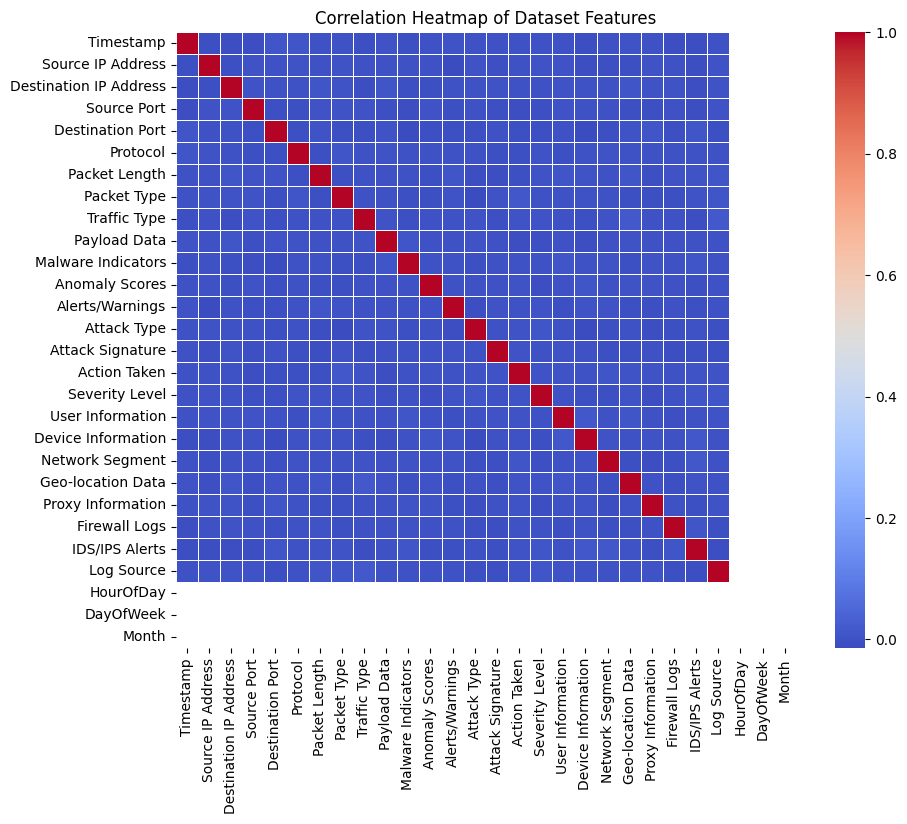

In [29]:
correlation_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Dataset Features')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

Random Forest Classifier Accuracy: 0.335375
Logistic Regression Accuracy: 0.339125
Gradient Boosting Classifier Accuracy: 0.33625


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [32]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

for model_name, model in models.items():
    print(model_name + " Evaluation:")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    print("\n")


Random Forest Classifier Evaluation:
Accuracy: 0.330625
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.36      2733
           1       0.32      0.32      0.32      2622
           2       0.33      0.29      0.31      2645

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



Logistic Regression Evaluation:
Accuracy: 0.339125
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.57      0.43      2733
           1       0.33      0.34      0.33      2622
           2       0.35      0.10      0.15      2645

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.31      8000
weighted avg       0.34      0.34      0.31      8000



Gradient Boosting Classifier Evaluation:
Accuracy: 0.33625
Classification Report:

Cluster
2    14970
1    12660
0    12370
Name: count, dtype: int64


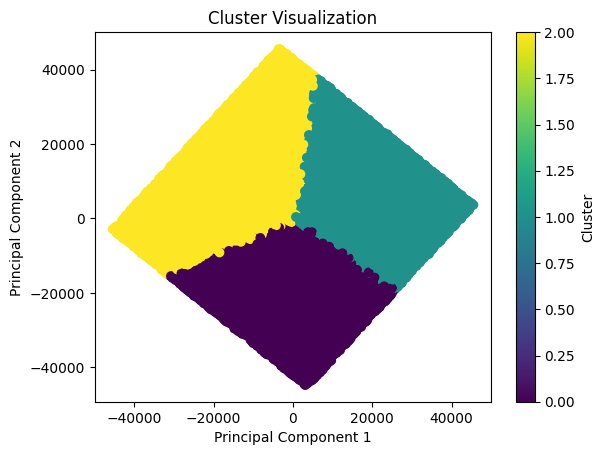

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data.select_dtypes(include=['number'])

kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

print(data['Cluster'].value_counts())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [34]:
from sklearn.ensemble import IsolationForest
import pandas as pd


for cluster_id in range(kmeans.n_clusters):
    cluster_data = X[data['Cluster'] == cluster_id]
    isolation_forest = IsolationForest(random_state=42)
    isolation_forest.fit(cluster_data)
    anomaly_scores = isolation_forest.decision_function(cluster_data)
    data.loc[data['Cluster'] == cluster_id, 'Anomaly_Score'] = anomaly_scores


threshold = 0
anomalies = data[data['Anomaly_Score'] < threshold]

print("Anomalies detected:")
print(anomalies.head())


Anomalies detected:
                      Timestamp  Source IP Address  Destination IP Address  \
0 1970-01-01 00:00:00.000036141                939                   37091   
1 1970-01-01 00:00:00.000006759              35826                   33418   
2 1970-01-01 00:00:00.000030425              32917                   19496   
3 1970-01-01 00:00:00.000037100              12598                     592   
4 1970-01-01 00:00:00.000037488              34515                   17716   

   Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
0        31225             17616         0            503            1   
1        17245             48166         0           1174            1   
2        16811             53600         2            306            0   
3        20018             32534         2            385            1   
4         6131             26646         1           1462            1   

   Traffic Type  Payload Data  ...  Geo-location Data  Proxy Infor

In [35]:
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop('Malware Indicators', axis=1)

# Initialize and fit Isolation Forest
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X)

# Predict anomalies
anomaly_scores = isolation_forest.decision_function(X)

# Add anomaly scores to the dataset
data['Anomaly Score'] = anomaly_scores

# Explore anomalies
threshold = data['Anomaly Score'].quantile(0.95)  # Adjust the threshold as needed
anomalies = data[data['Anomaly Score'] > threshold]

print("Number of anomalies detected:", len(anomalies))
print(anomalies.head())


Number of anomalies detected: 2000
    Timestamp  Source IP Address  Destination IP Address  Source Port  \
17      33274              22427                   26751        16513   
55      27962              24019                   28832        11468   
60      18734              18363                   17620        22371   
82      16100              24282                   14806        53318   
83      10353              19551                   11787        15743   

    Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
17             50583         1            969            1             2   
55             31398         1            632            1             1   
60              4914         0           1001            1             2   
82             29162         1            744            1             2   
83             33364         1            173            0             2   

    Payload Data  ...  Severity Level  User Information  Device Infor

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)

mean_score = scores.mean()
std_score = scores.std()
print("Mean Accuracy:", mean_score)
print("Standard Deviation of Accuracy:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


In [37]:
from sklearn.decomposition import PCA
import pandas as pd

file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

numeric_data = data.select_dtypes(include=['number'])

for column in numeric_data.columns:
    feature = numeric_data[[column]]

    pca = PCA(n_components=1)

    transformed_feature = pca.fit_transform(feature)

    data[f'{column}_PCA'] = transformed_feature.flatten()

print(data.head)
print(data.columns)

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

In [38]:
import pandas as pd
file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Source Port  Destination Port  Packet Length  Anomaly Scores
Source Port          1.000000         -0.005216       0.003657        0.004826
Destination Port    -0.005216          1.000000       0.002581       -0.003616
Packet Length        0.003657          0.002581       1.000000       -0.003599
Anomaly Scores       0.004826         -0.003616      -0.003599        1.000000


In [39]:
import pandas as pd

file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

if 'Attack Type' in data.columns:
    data.drop(columns=['Attack Type'], inplace=True)

def determine_attack_type(row):
    if row['Protocol'] == 'UDP' and 'HTTP' in row['Packet Type']:
        return 'DDoS'
    elif row['Protocol'] == 'TCP' and 'DNS' in row['Packet Type']:
        return 'DNS Amplification'
    elif row['Protocol'] == 'ICMP' and 'Data' in row['Packet Type']:
        return 'ICMP Flood'
    else:
        return 'Other'

data['Attack Type'] = data.apply(determine_attack_type, axis=1)

print(data['Attack Type'].value_counts())



print("Unique Protocols:", data['Protocol'].unique())
print("Unique Packet Types:", data['Packet Type'].unique())

print("Protocol Value Counts:")
print(data['Protocol'].value_counts())
print("Packet Type Value Counts:")
print(data['Packet Type'].value_counts())

if 'Attack Type' in data.columns:
    data.drop(columns=['Attack Type'], inplace=True)

ddos_data = data[((data['Protocol'] == 'TCP') | (data['Protocol'] == 'UDP')) & (data['Traffic Type'].isin(['HTTP', 'DNS']))]

print("Rows corresponding to DDoS attacks:")
print(ddos_data)


Attack Type
Other         33459
ICMP Flood     6541
Name: count, dtype: int64
Unique Protocols: ['ICMP' 'UDP' 'TCP']
Unique Packet Types: ['Data' 'Control']
Protocol Value Counts:
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64
Packet Type Value Counts:
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64
Rows corresponding to DDoS attacks:
                 Timestamp Source IP Address Destination IP Address  \
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
5      2022-10-28 13:14:27     198.102.5.160        147.190.155.133   
6      2022-05-16 17:55:43     97.253.103.59           77.16.101.53   
...                    ...               ...                    ...   
39989  2020-02-25 12:10:40     109.15.148.90         136.251.191.39   
39990  2022-03-17 12:32:16    149.46.211.

Pickling the model

In [40]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = r'cybersecurity_attacks.csv'
data = pd.read_csv(file_path)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


with open('preprocessing_model.pkl', 'wb') as f:
    pickle.dump((scaled_data, scaler), f)
print("Scaled Data:")
print(scaled_data)



Scaled Data:
[[-0.09403762 -0.83635746 -0.66929478 -0.74319123]
 [-0.84726252  0.80837614  0.94353482  0.04805446]
 [-0.8706459   1.10092875 -1.14280809  1.29297541]
 ...
 [-0.56386031 -0.43063856  0.62866049 -0.66209115]
 [-0.69812615 -1.63923511 -0.7173672   1.65445998]
 [ 0.92491727  1.20725768  0.94593844 -0.53662863]]
